# **Prediction script for the models**

## **Imports**

In [1]:
# imports

import torch
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModel, AutoTokenizer, BitsAndBytesConfig
from models.ResQwen.ResQwenDataset import ResQwenDataset
from models.ResQwen.ResQwen import ResQwen

/home/bapt/projects/predict-youtube-views/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
test_set = pd.read_csv('./dataset/test_set.csv', sep=';')
test_set

,id,title,description,year,sin_month,cos_month,sin_dayofmonth,cos_dayofmonth,sin_hour,cos_hour,...,UCk6Znl7ryh2dKCX5opiu7ng,UCkE6ZzUxUY_XMP688ib-RWA,UCl6p6SZMiI966k1ZzdzY9sA,UCpJ6Dn01AqjvFVN2EiK72Ag,UCpUhcwq3oB7HKvrNeQmxJsg,UCpa2QppVwCuivaWe5qfVY_Q,UCrSvhrtUgpZT3EU0x1Zoy-w,UCrUPTKJg_Oe-Bc4aC5CzrEQ,UCsD-Qms-AkXDrsU962OicLw,UCyp-EzJrdTOd9uNPvmdst-w
0,0,নিজের অতীত ভুলে গেলে #bengalimovies #banglacin...,Enjoy and stay connected with us!!\n\nSubscrib...,0.928571,-2.449294e-16,1.000000e+00,-0.651372,-0.758758,7.071068e-01,7.071068e-01,...,0,0,0,0,0,0,0,0,0,0
1,1,2024: A YEAR IN FILMS,"Here we are, at the end of another cinematic y...",0.928571,-5.000000e-01,8.660254e-01,-0.937752,0.347305,-9.659258e-01,-2.588190e-01,...,0,0,0,0,0,0,0,0,0,0
2,2,Short film on Argentina's military dictatorshi...,"Argentina, on 1983. A woman dedicates her whol...",0.928571,-1.000000e+00,-1.836970e-16,-0.897805,-0.440394,-2.588190e-01,-9.659258e-01,...,0,0,0,0,0,0,0,0,0,0
3,3,Rupantar | রূপান্তর - Full Movie | Sabyasachi ...,"Watch the Bengali Full Movie ""Rupantar"" Starri...",0.928571,-8.660254e-01,5.000000e-01,-0.485302,-0.874347,1.224647e-16,-1.000000e+00,...,0,0,0,0,0,0,0,0,0,0
4,4,ALEPPO | Omeleto Drama,A doctor suffers a brain injury.\n\n\nALEPPO i...,0.928571,-5.000000e-01,-8.660254e-01,-0.724793,0.688967,8.660254e-01,5.000000e-01,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,3397,VISKAR I VINDEN | Omeleto Comedy,A man investigates a murder.\n\n\nVISKAR I VIN...,0.928571,5.000000e-01,8.660254e-01,-0.988468,0.151428,1.000000e+00,6.123234e-17,...,0,0,0,0,0,0,0,0,0,0
3398,3398,THE SESSION | Omeleto Drama,A musician is chained to a piano.\n\n\nTHE SES...,0.928571,5.000000e-01,8.660254e-01,-0.485302,-0.874347,1.000000e+00,6.123234e-17,...,0,0,0,0,0,0,0,0,0,0
3399,3399,REVENGE OF THE ELECTRIC CART | Omeleto Drama,A young girl overcome prejudice.\n\n\nREVENGE ...,0.928571,8.660254e-01,5.000000e-01,0.897805,-0.440394,9.659258e-01,2.588190e-01,...,0,0,0,0,0,0,0,0,0,0
3400,3400,LIKENESS | Omeleto,A young woman investigates her mother's disapp...,0.928571,8.660254e-01,5.000000e-01,-0.848644,0.528964,9.659258e-01,2.588190e-01,...,0,0,0,0,0,0,0,0,0,0


In [3]:
val_set = pd.read_csv('./dataset/validation_set.csv', sep=';')
val_set

,id,title,description,views,year,logviews,sin_month,cos_month,sin_dayofmonth,cos_dayofmonth,...,UCkE6ZzUxUY_XMP688ib-RWA,UCl6p6SZMiI966k1ZzdzY9sA,UCpJ6Dn01AqjvFVN2EiK72Ag,UCpUhcwq3oB7HKvrNeQmxJsg,UCpa2QppVwCuivaWe5qfVY_Q,UCrSvhrtUgpZT3EU0x1Zoy-w,UCrUPTKJg_Oe-Bc4aC5CzrEQ,UCsD-Qms-AkXDrsU962OicLw,UCyp-EzJrdTOd9uNPvmdst-w,logviews_bin
0,RS7oawgUns4,TheCGBros CGI 3D Animated Shorts: LiveStream!,Watch More CGI 3D Animated Shorts HERE ► https...,0.0,0.500000,0.000000,-2.449294e-16,1.000000e+00,0.201299,0.979530,...,0,0,0,0,0,0,0,0,0,0
1,tIvNLmI18b4,Animated Short Film,CGI 3D Animated Short Films https://www.youtub...,0.0,0.714286,0.000000,8.660254e-01,5.000000e-01,-0.998717,-0.050649,...,0,0,0,0,0,1,0,0,0,0
2,uAl6erIFir4,Scituate in 4K,Playing around with my new Panasonic Lumix g7,218.0,0.642857,5.389072,-1.000000e+00,-1.836970e-16,0.201299,0.979530,...,0,0,0,0,0,0,0,0,0,0
3,ZR5zA6K8h1E,Monster Mix Tape #monsters #creatures #spooky ...,#shorts #monsters #horrorstories #creaturedesi...,109.0,0.857143,4.700480,8.660254e-01,5.000000e-01,-0.299363,-0.954139,...,0,0,0,0,0,0,0,0,0,0
4,4wDLvff5cnM,South Padre 2018,NaN,86.0,0.500000,4.465908,-1.000000e+00,-1.836970e-16,0.724793,0.688967,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,PpL4i5To2Nc,Rupban Kanya | রূপবান কন্যা | Bengali Movie | ...,Watch the Bengali full movie Rupban Kanya : রূ...,8567354.0,0.571429,15.963470,-1.000000e+00,-1.836970e-16,0.998717,-0.050649,...,0,0,0,0,0,0,0,0,0,6
2496,JutrLer3k-A,"CGI Animated Short Film: ""Game Changer"" by Avi...",CGI 3D Animated Short Film: Game Changer Anima...,9289273.0,0.500000,16.044371,1.224647e-16,-1.000000e+00,-0.848644,0.528964,...,0,0,0,0,0,1,0,0,0,6
2497,m5VChF2vz4Q,"Horror Short Film ""The Follower"" | ALTER",Fueled by the hope of escaping her dreary subu...,1427399.0,0.714286,14.171365,1.000000e+00,6.123234e-17,0.201299,0.979530,...,0,0,0,0,0,0,0,0,0,6
2498,M3hUDqOtwxY,FILL YOUR HEART WITH FRENCH FRIES | Omeleto,A woman gets dumped.\n\n\nFILL YOUR HEART WITH...,1677631.0,0.428571,14.332894,-5.000000e-01,-8.660254e-01,0.299363,-0.954139,...,0,0,0,0,0,0,0,0,0,6


## **Prediction function**

In [4]:
def predict(model, dataset, params_path, savepath=None):
    """
    Predict the labels of the test set using the trained model.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    print(f"Using device: {device}")

    # Load the model with strict=False to allow partial loading
    try:
        # First attempt to load with normal strict setting
        model.load_state_dict(torch.load(params_path))
        print("Model loaded successfully with exact parameter match")
    except RuntimeError as e:
        print(f"Warning: {e}")
        print("Attempting to load with strict=False...")
        
        # Load the saved parameters
        saved_state = torch.load(params_path)
        
        # Filter out quantized parameters (those from qwen model)
        filtered_state = {
            k: v for k, v in saved_state.items() 
            if not k.startswith('qwen.model.') and k in model.state_dict()
        }
        
        # Load only non-qwen parameters
        model.load_state_dict(filtered_state, strict=False)
        print(f"Loaded {len(filtered_state)}/{len(saved_state)} parameters. Skipped qwen.model.* parameters.")
        
    model.eval()

    def collate_fn(batch):
        return {
            "image": torch.stack([x["image"] for x in batch]),
            "title": [x["title"] for x in batch],
            "date": torch.stack([x["date"] for x in batch]),
            "channel": torch.stack([x["channel"] for x in batch]),
            "id": [x["id"] for x in batch]
        }

    test_loader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=False, 
                                               collate_fn=collate_fn, num_workers=0)
    all_predictions = []
    all_ids = []

    with torch.no_grad():
        progress_bar = tqdm.tqdm(test_loader, desc="Validating", leave=False)
        for i, batch in enumerate(progress_bar):
            try:
                inputs = {
                "image": batch["image"].to(device),
                "title": batch["title"],
                "date": batch["date"].to(device),
                "channel": batch["channel"].to(device)
                }
                outputs = model(inputs)
                all_predictions.extend(torch.expm1(outputs).cpu().numpy().flatten().tolist())
                all_ids.extend(batch["id"])

            except Exception as e:
                print(f"Error processing batch {i}: {e}")
                print(f"Batch keys: {list(batch.keys())}")
                for k, v in batch.items():
                    print(f"{k}: {type(v)}")
                break
    
    # Create a DataFrame to store the predictions
    predictions_df = pd.DataFrame({
        "ID": all_ids,
        "predictions": all_predictions
    })
    predictions_df = predictions_df.sort_values('ID')

    # Save the predictions to a CSV file
    if savepath :
        predictions_df.to_csv(savepath, index=False)
        print("Predictions saved to " + savepath)
    return predictions_df

## **Compute predictions on test set**

In [ ]:
dataset = ResQwenDataset("./dataset/test_set.csv", "./dataset/test/", ratio=1, is_test=True)

quant_config = BitsAndBytesConfig(
            load_in_8bit=True,
            llm_int8_enable_fp32_cpu_offload=True
)

qwen = AutoModel.from_pretrained("./models/ResQwen/qwen_ckpt/", quantization_config=quant_config, device_map="auto")
model = ResQwen(freeze_qwen=True, semifreeze_qwen=False, freeze_resnet=True, semifreeze_resnet=False)
model.qwen.model = qwen
model.qwen.tokenizer = AutoTokenizer.from_pretrained("./models/ResQwen/qwen_ckpt/")

params_path = "./models/ResQwen/ResQwen_model_phase_1.pth"

prediction_df = predict(model, dataset, params_path, savepath='./predictions_test_set.csv')
prediction_df

## **Compute predictions on custom unseen test**

In [ ]:
custom_test = pd.read_csv('./dataset/equilibrated_custom_test_set.csv', sep=';')

custom_test_set = ResQwenDataset("./dataset/equilibrated_custom_test_set.csv", "./dataset/train_val/", ratio=1, is_test=True)
custom_prediction_df = predict(model, custom_test_set, params_path)

# Plot and compute the loss :

merged = custom_test.merge(custom_prediction_df, left_on='id', right_on='ID', how='inner')
merged = merged[['id', 'predictions', 'logviews']]
loss = torch.nn.MSELoss(merged['logviews'], merged['predictions'])

print("MSE Loss on the unseen test set : ", loss.item())

plt.figure(figsize=(10, 5))
plt.scatter(merged['logviews'], merged['predictions'], alpha=0.5)
plt.plot([merged['logviews'].min(), merged['logviews'].max()], [merged['logviews'].min(), merged['logviews'].max()], 'r--')
plt.xlabel('True Log Views')
plt.ylabel('Predicted Log Views')
plt.title('True vs Predicted Log Views')
plt.show()

In [ ]:
# plot the distribution of the predictions

plt.figure(figsize=(10, 5))
plt.hist(merged['predictions'], bins='auto', alpha=0.7, label='Predictions')
plt.hist(merged['logviews'], bins='auto', alpha=0.7, label='True Log Views')
plt.xlabel('Log Views')
plt.ylabel('Frequency')
plt.title('Distribution of True and Predicted Log Views')
plt.legend()
plt.show()

## **Comparisons with other predictions**

In [36]:
# Compute the loss with a prediction that we know is "good" (3.83 on hidden test set)

goated_df = pd.read_csv("./predictions_goated.csv", sep=',')
merged_df = pd.merge(prediction_df, goated_df, on="ID", suffixes=('', '_goated'))
loss = np.mean((np.log1p(merged_df["predictions_goated"]) - np.log1p(merged_df["predictions"])) ** 2)
merged_df['gap'] = (np.log1p(merged_df["predictions_goated"]) - np.log1p(merged_df["predictions"]))**2
print(f"Loss between this prediction and the goated one : {loss}")
print(f"Max gap between this prediction and the goated one : {merged_df['gap'].max()}")

Loss between this prediction and the goated one : 1.82192067310807
Max gap between this prediction and the goated one : 5.9444009914345175


In [37]:
# predict on the validation set

dataset = ResQwenDataset("./dataset/processed_validation_set_witheverychannel.csv", "./dataset/train_val", ratio=1, is_test=True)
prediction_df_val = predict(model, dataset, params_path)

prediction_df_val

Using device: cuda
	Unexpected key(s) in state_dict: "qwen.model.layers.0.self_attn.q_proj.weight.absmax", "qwen.model.layers.0.self_attn.q_proj.weight.quant_map", "qwen.model.layers.0.self_attn.q_proj.weight.nested_absmax", "qwen.model.layers.0.self_attn.q_proj.weight.nested_quant_map", "qwen.model.layers.0.self_attn.q_proj.weight.quant_state.bitsandbytes__nf4", "qwen.model.layers.0.self_attn.k_proj.weight.absmax", "qwen.model.layers.0.self_attn.k_proj.weight.quant_map", "qwen.model.layers.0.self_attn.k_proj.weight.nested_absmax", "qwen.model.layers.0.self_attn.k_proj.weight.nested_quant_map", "qwen.model.layers.0.self_attn.k_proj.weight.quant_state.bitsandbytes__nf4", "qwen.model.layers.0.self_attn.v_proj.weight.absmax", "qwen.model.layers.0.self_attn.v_proj.weight.quant_map", "qwen.model.layers.0.self_attn.v_proj.weight.nested_absmax", "qwen.model.layers.0.self_attn.v_proj.weight.nested_quant_map", "qwen.model.layers.0.self_attn.v_proj.weight.quant_state.bitsandbytes__nf4", "qwen.mo

,ID,predictions
1708,-0OO9rjHHRI,84076.132812
1782,-0zw12ijz8g,209030.515625
808,-1enK4XQvow,33170.355469
510,-31D_Vm9m5k,144474.625000
1858,-5f1v37rvNQ,142893.046875
...,...,...
2425,zmW26B7Rb-M,44216.695312
1799,zm_M3XDsvo8,24131.605469
1302,znowFHNvfWE,163124.718750
3213,zo9wauLVcIY,90068.562500


In [39]:
# Function to compute the custom loss function

def custom_loss_function(prediction_df, val_set):
    """
    Custom loss function to compute the accuracy of the predictions.
    """
    merged = val_set.merge(prediction_df, left_on='id', right_on='ID', how='inner')
    print(f"Number of rows in merged DataFrame: {len(merged)}")
    print(f"Number of rows in val_set: {len(val_set)}")
    print(f"Number of rows in prediction_df: {len(prediction_df)}")
    true_views = merged['views'].values
    pred_views = merged['predictions'].values
    msle = np.mean((np.log1p(true_views) - np.log1p(pred_views))**2)
    return msle

In [40]:
# Compute the loss on the validation set

custom_loss_function(prediction_df_val, val_set)

Number of rows in merged DataFrame: 3402
Number of rows in val_set: 3402
Number of rows in prediction_df: 3402


np.float64(3.0048578439481477)

In [41]:
# Make a prediciton with the average value of the training set

test_ids = test_set['id'].values
mean_views = train_dataset.df['views'].mean()
mean_views_tab = np.full(test_ids.shape, mean_views)
mean_views_df = pd.DataFrame({
    'ID': test_ids,
    'predictions': mean_views_tab
})
mean_views_df.to_csv('./predictions_test_set_mean.csv', index=False)

## **Plots**

Sample of missing IDs: []
MSLE on matched data: 3.0048578439481477


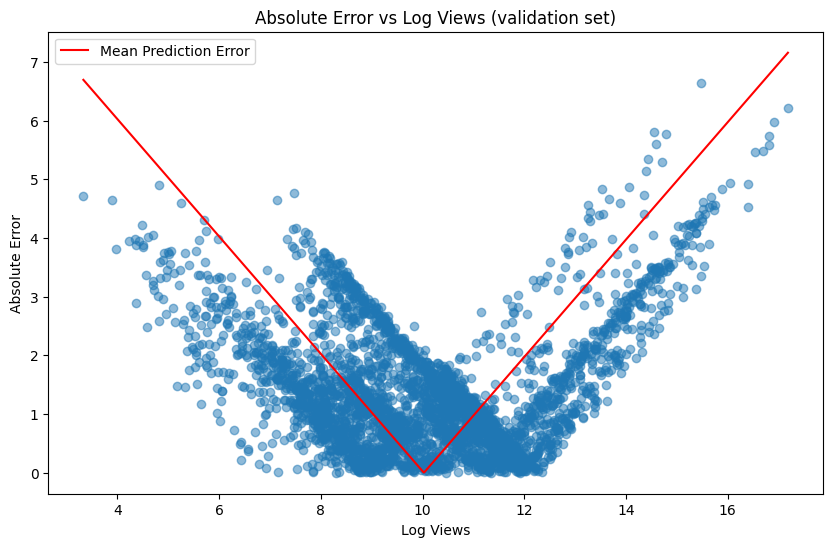

In [42]:
# We plot the absolute error of the predictions as a function of the logviews

# Merge the dataframes on ID to get only matching records
merged_val = val_set.merge(prediction_df_val, left_on='id', right_on='ID', how='inner')

# Check for any missing IDs
missing_ids = set(val_set['id'].values) - set(prediction_df_val['ID'].values)
print(f"Sample of missing IDs: {list(missing_ids)[:10]}")

# Then use only the merged data for your calculations
true_views = np.expm1(merged_val['logviews'].values)
pred_views = merged_val['predictions'].values
msle = np.mean((np.log1p(true_views) - np.log1p(pred_views))**2)
print(f"MSLE on matched data: {msle}")

# For your plot, also use only the matched data
plt.figure(figsize=(10, 6))
plt.scatter(merged_val['logviews'].values, 
           np.abs(merged_val['logviews'].values - np.log1p(merged_val['predictions'].values)), 
           alpha=0.5)
plt.title('Absolute Error vs Log Views (validation set)')
plt.xlabel('Log Views')
plt.ylabel('Absolute Error')

# plot the thing obtained by predicting the mean of the training set's logviews
sorted_logviews = np.sort(merged_val['logviews'].values)
mean_logviews = np.mean(merged_val['logviews'].values)
plt.plot(sorted_logviews, 
         np.abs(sorted_logviews - mean_logviews),
         color='red', label='Mean Prediction Error')
plt.legend()
plt.show()

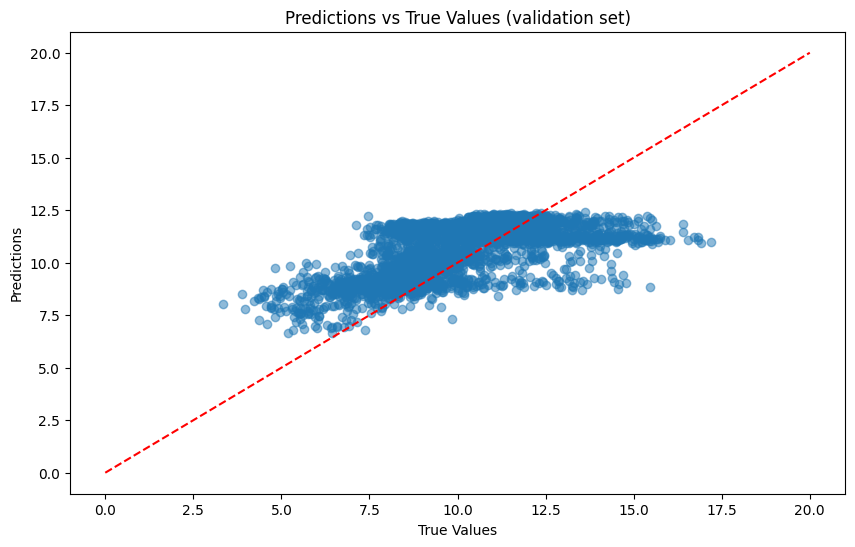

In [43]:
# plot the predictions vs the true values

plt.figure(figsize=(10, 6))
plt.scatter(merged_val['logviews'].values,
           np.log1p(merged_val['predictions'].values), 
           alpha=0.5)
plt.title('Predictions vs True Values (validation set)')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([0, 20], [0, 20], color='red', linestyle='--')  # Diagonal line
plt.show()

Sample of missing IDs: []
MSLE on matched data: 3.009413209549846


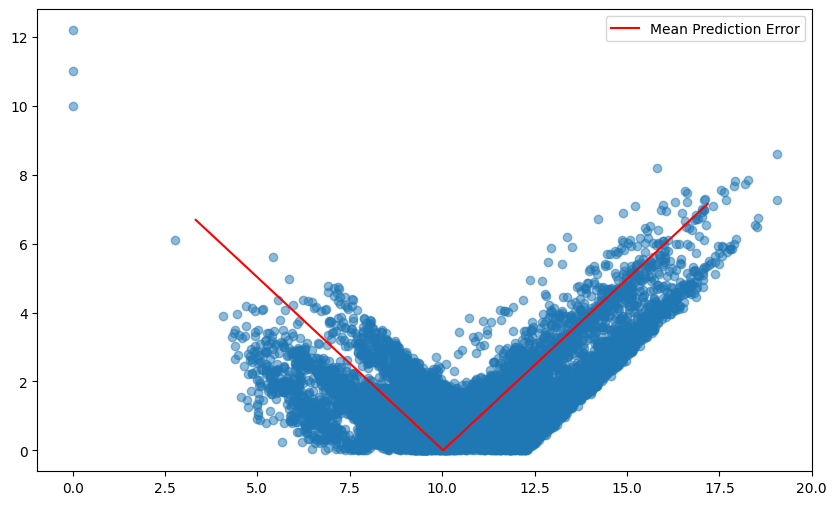

In [44]:
# We plot the absolute error of the predictions as a function of the logviews

train_set = pd.read_csv('./dataset/processed_training_set_witheverychannel.csv', sep=';')

# Merge the dataframes on ID to get only matching records
merged_train = train_set.merge(prediction_df_train, left_on='id', right_on='ID', how='inner')

# Check for any missing IDs
missing_ids = set(train_set['id'].values) - set(prediction_df_train['ID'].values)
print(f"Sample of missing IDs: {list(missing_ids)[:10]}")

# Then use only the merged data for your calculations
true_views = np.expm1(merged_train['logviews'].values)
pred_views = merged_train['predictions'].values
msle = np.mean((np.log1p(true_views) - np.log1p(pred_views))**2)
print(f"MSLE on matched data: {msle}")

# For your plot, also use only the matched data
plt.figure(figsize=(10, 6))
plt.scatter(merged_train['logviews'].values, 
           np.abs(merged_train['logviews'].values - np.log1p(merged_train['predictions'].values)), 
           alpha=0.5)

# plot the thing obtained by predicting the mean of the training set's logviews
sorted_logviews = np.sort(merged_val['logviews'].values)
mean_logviews = np.mean(merged_val['logviews'].values)
plt.plot(sorted_logviews, 
         np.abs(sorted_logviews - mean_logviews),
         color='red', label='Mean Prediction Error')
plt.legend()
plt.show()

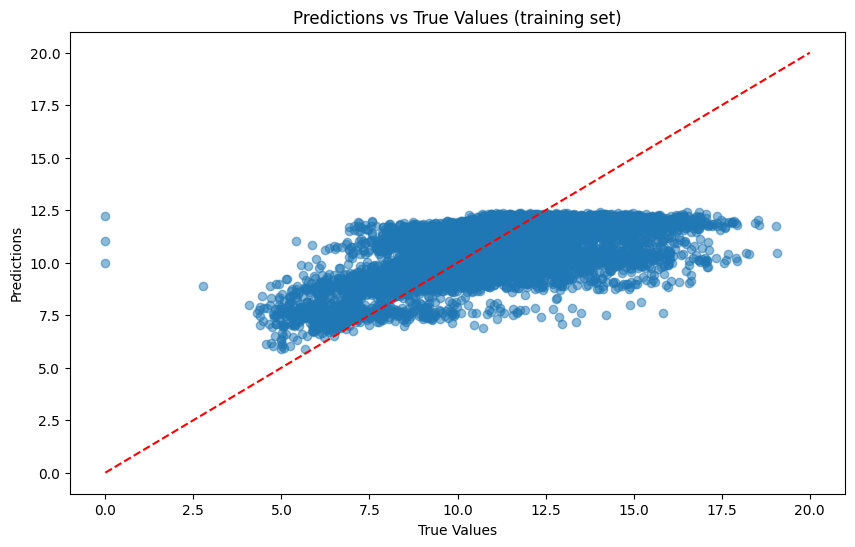

In [45]:
# plot the predictions vs the true values

plt.figure(figsize=(10, 6))
plt.scatter(merged_train['logviews'].values,
           np.log1p(merged_train['predictions'].values), 
           alpha=0.5)
plt.title('Predictions vs True Values (training set)')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([0, 20], [0, 20], color='red', linestyle='--')  # Diagonal line
plt.show()